In [4]:
#mporting the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

# Read train.csv file and set datatype
data_type = {'store': 'int8', 'item': 'int8', 'sales': 'int16'}
df = pd.read_csv("D:/Users/pradeep.kottalage/Desktop/ML/train/train.csv", parse_dates= ['date'], dtype= data_type)
#print(df)
df.describe()


,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [5]:
# Dimensions
print('Train shape:', df.shape)

Train shape: (913000, 4)


In [74]:
###df['week'] = df['date'].dt.week
df['weekofyear'] = df['date'].dt.weekofyear
df['dayofweek'] = df['date'].dt.dayofweek
##df['day']=df['date'].dt.day
##df['dayofweek'] = df['date'].dt.dayofweek
##df['weekday'] = df['date'].dt.weekday
df['weekday_name'] = df['date'].dt.weekday_name
df['dayofyear']=df['date'].dt.dayofyear
df['quarter'] = df['date'].dt.quarter
#df['is_month_start'] = df['date'].dt.is_month_start
#df['is_month_end'] = df['date'].dt.is_month_end
#df['is_quarter_start']=df['date'].dt.is_quarter_start
#df['is_quarter_end'] = df['date'].dt.is_quarter_end
#df['is_year_start'] = df['date'].dt.is_year_start
#df['is_year_end'] = df['date'].dt.is_year_end
##df['freq']=df['date'].dt.freq
##df['daysinmonth'] = df['date'].dt.daysinmonth
##df['days_in_month'] = df['date'].dt.days_in_month
df.drop('date', axis=1, inplace=True)
df['weekend'] = ((df['dayofweek']) // 5 == 1).astype(float)
#print(df)


In [19]:
df = pd.get_dummies(df)
print(df)

        store  item  sales  weekofyear  dayofweek  dayofyear  quarter  \
0           1     1     13           1          1          1        1   
1           1     1     11           1          2          2        1   
2           1     1     14           1          3          3        1   
3           1     1     13           1          4          4        1   
4           1     1     10           1          5          5        1   
5           1     1     12           1          6          6        1   
6           1     1     10           2          0          7        1   
7           1     1      9           2          1          8        1   
8           1     1     12           2          2          9        1   
9           1     1      9           2          3         10        1   
10          1     1      9           2          4         11        1   
11          1     1      7           2          5         12        1   
12          1     1     10           2          6  

In [17]:
col = [i for i in df.columns if i not in ['sales']]
print(col)

['date', 'store', 'item']


In [24]:
y = [i for i in df.columns if i in ['sales']]

print(y)

['sales']


In [75]:
train = df.loc[~df.sales.isna()]
#print(train)

In [25]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(train[col],train[y], test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
#X_train.head()


(730400, 3)
(182600, 3)


['sales']

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


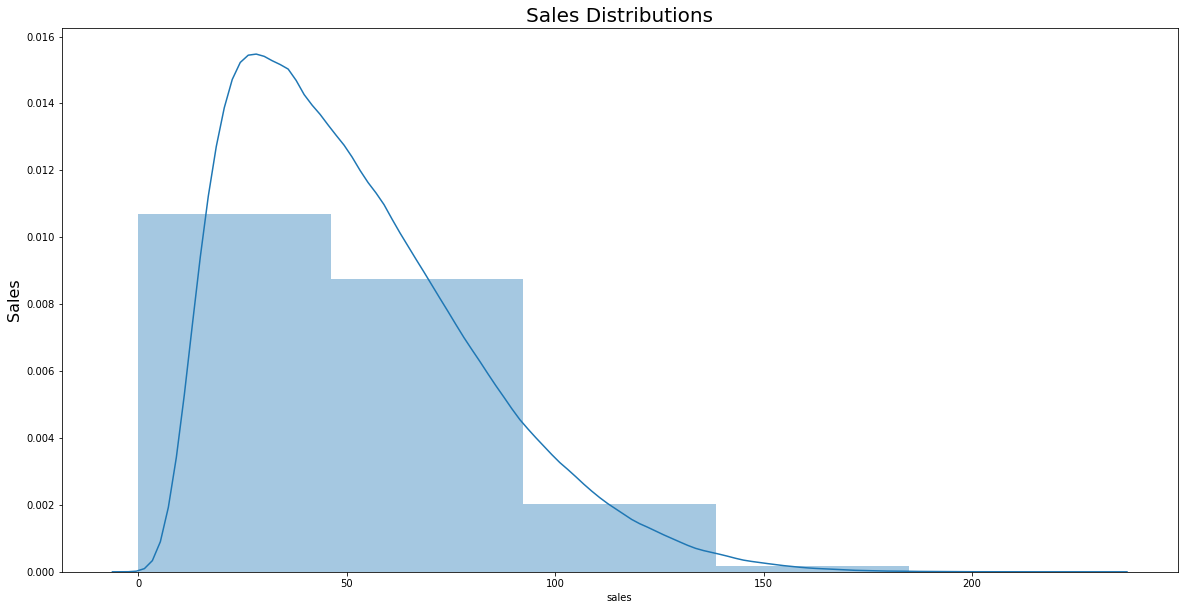

In [40]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(train[col],train[y], test_size=0.2, random_state=42)


import matplotlib.pyplot as plt
import seaborn as sns

y = [i for i in df.columns if i in ['sales']]
display(y)
fig, ax = plt.subplots(figsize=(20, 10))
#display(y_train)
ax = sns.distplot(y_train['sales'], bins=5);

ax.set_ylabel(ylabel='Sales', fontsize=16)
ax.set_title(label='Sales Distributions', fontsize=20)
plt.show();


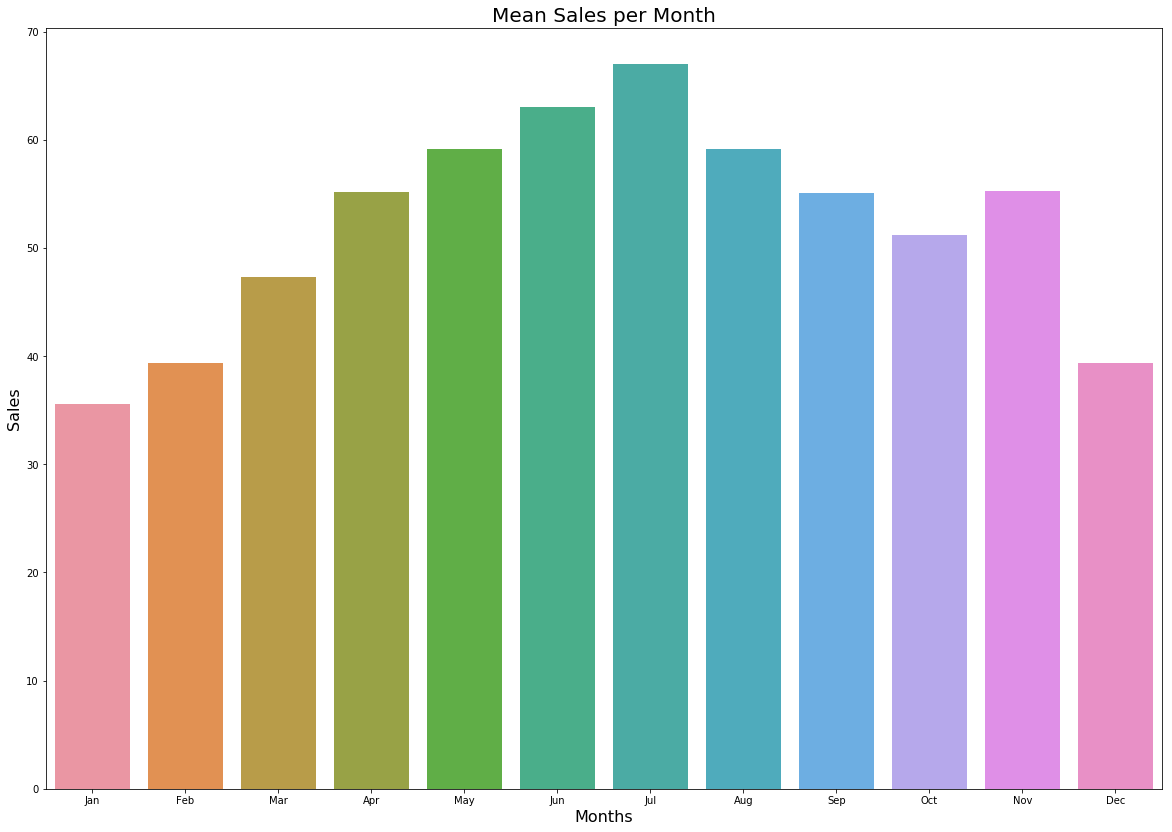

In [73]:

import matplotlib.pyplot as plt
import seaborn as sns
train['WhichMonth']= train['date'].dt.month
train['WhichYear']= train['date'].dt.year

x = train.groupby([train.WhichMonth])['sales'].mean()


f, ax = plt.subplots(figsize=(20, 14))
x.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

ax = sns.barplot(x=x.index, y=x.values, 
               label="Total")

ax.set_xlabel(xlabel='Months', fontsize=16)
ax.set_ylabel(ylabel='Sales', fontsize=16)
ax.set_title(label='Mean Sales per Month', fontsize=20)
plt.show();

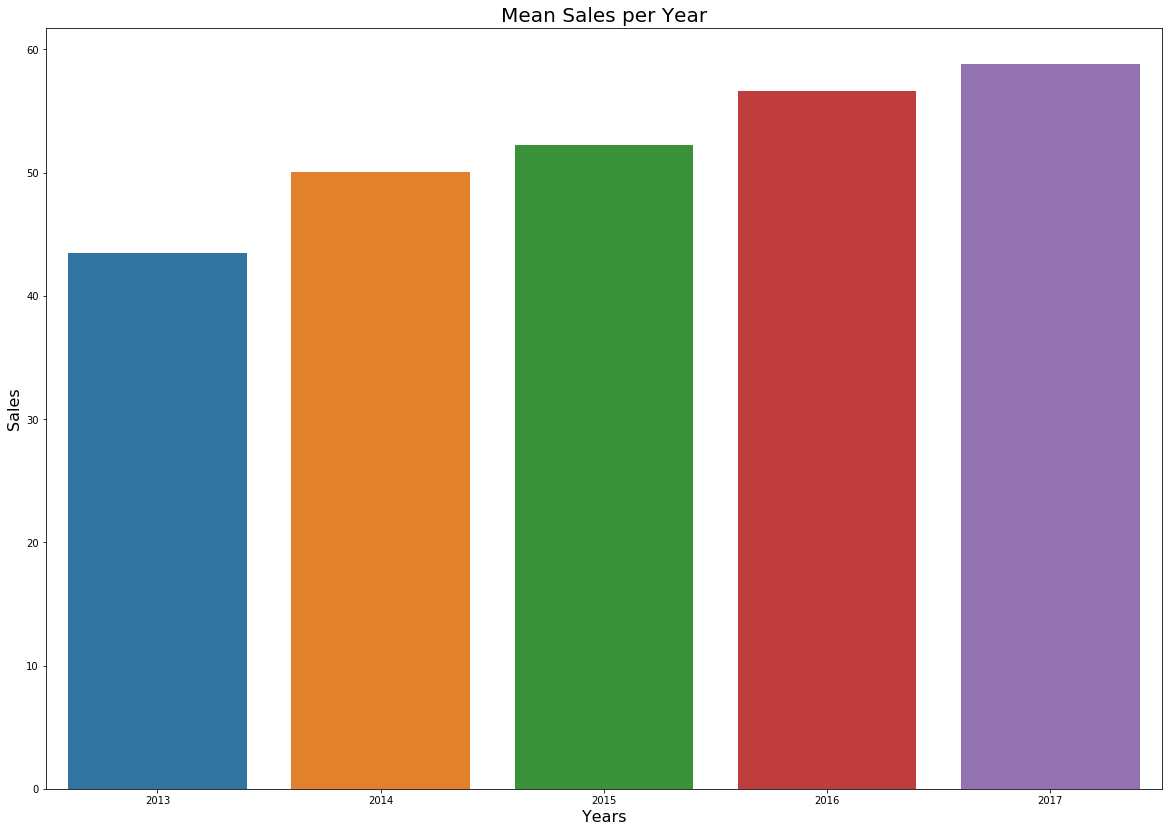

In [69]:
x = train.groupby([train.WhichYear])['sales'].mean()

f, ax = plt.subplots(figsize=(20, 14))
x.index = ["2013", "2014", "2015", "2016", "2017"]
ax = sns.barplot(x=x.index, y=x.values, 
               label="Total")

ax.set_xlabel(xlabel='Years', fontsize=16)
ax.set_ylabel(ylabel='Sales', fontsize=16)
ax.set_title(label='Mean Sales per Year', fontsize=20)
plt.show();